- 선형계획법의 기초가 되는 이론일 것 같다. 쌍대성에 대해 다룬다.

### 컷(Cut)
- 그래프 `G=(V,E)`의 컷은 그래프의 정점 집합 V를 두 개의 부분집합으로 분할하는 것이다.
- 다음과 같은 그래프를 양분한다고 하자.
  - 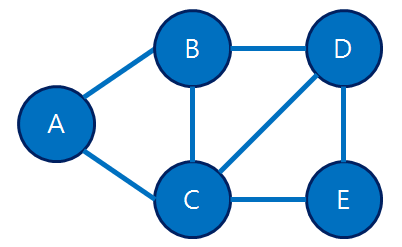
- 이때 정점 A와 정점 E를 분리한다면 다음과 같이 자를 수 있다.
  - 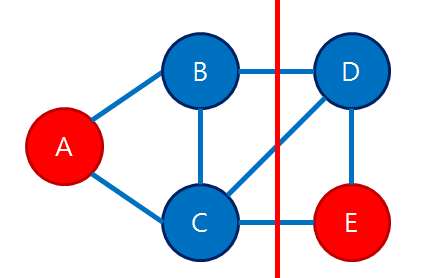
- 즉 간선 몇개를 골라서 끊었을 때 그 그래프가 두개의 컴포넌트로 분리된다면, 그 간선들을 컷이라고 한다.
  - 컴포넌트란, 그래프에서 정점들이 서로 연결되어 있는 부분을 의미한다.
- 컷에 비용개념을 추가할 수 있다. 가중치 있는 그래프에선 간선의 가중치가, 그렇지 않은 경우에는 간선의 개수를 그 비용으로 생각할 수 있다.
- 최소컷은 컷 중에서 비용이 가장 작은 컷을 의미한다. 위의 경우 비용이 3인 컷이다.
  - 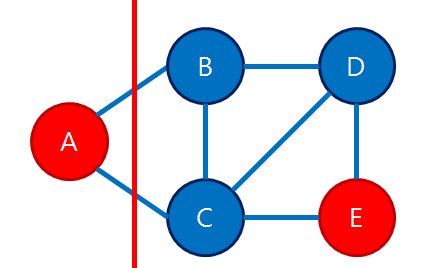
  - 최소컷으로 자른다면 이런 모양으로 비용은 2이다.
- 방향그래프라면 A에서 E로가는 간선들만 제거하면 된다.
  - 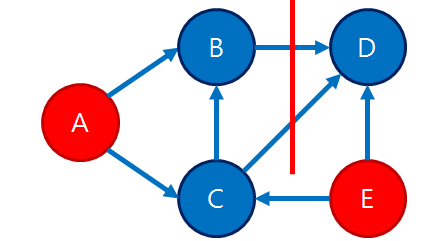
  - 또는 $\overrightarrow{AB}$, $\overrightarrow{AC}$ 를 제거해도 될 것이다.


### 최대유량 최소컷 정리(Max Flow Min Cut Theorem)
- 정점 `S`와 `T`가 있을 때 `S`와 `T`를 분리시키는 최소컷의 비용은 Source가 `S`이고 Sink가 `T`인 최대유량과 동치이다.
  - ![image.png](assets/mcmf-5.png)
  - 그래프의 최소컷은 위와 같고, 이를 최대유량을 흘리는 유량그래프로 표현하면
  - ![image-2.png](assets/mcmf-6.png)
  - 와 같은데, 어떤 컷을 골라도 그 `컷에 포함된 간선에서 흐르는 유량의 합은 항상 동치`이다.
    - $\overrightarrow{AB}$, $\overrightarrow{CB}$, $\overrightarrow{CD}$ 를 컷한다면 그 비용은 $2 + 6 + 3 = 11$,\
    $\overrightarrow{SA}$, $\overrightarrow{SC}$ 를 컷한다면 그 비용은 $6 + 5 = 11$,\
    $\overrightarrow{BT}$, $\overrightarrow{DT}$ 를 컷한다면 그 비용은 $7 + 4 = 11$ 등 모두 같은 것을 확인할 수 있다.
- 컷을 어떻게 잡느냐에 따라 그 간선들의 용량의 합은 다를 수 있으나, 유량의 합은 항상 같다. 그리고 그렇기에 최대유량과 최소컷은 동일하다.

### 증명(귀류법)
- ![image.png](assets/mcmf-7.png)
  - 아직 유량이 포화되지 않은(not fully saturated) 간선(초록색이 도착점인 정점)을 통과할 수 있다고 할 때, `S`에서 시작하여 도달 가능한 정점과 도달 불가능한 정점으로 나눌 수 있다.\
  도달 가능한 정점은 `{S, A, B, C}`, 도달 불가능한 정점은 `{D, T}`가 된다.
  - `도달 가능한 정점 집합`을 $A$, `도달 불가능한 정점 집합`을 $B$라고 할 때, 이 포화 간선 $\overrightarrow{BD}$, $\overrightarrow{BT}$, $\overrightarrow{CD}$ (빨간색 간선)을 기준으로 `A`와 `B`가 나뉘게 되며 이것이 최소컷이다.
- $\text {Assumption.}$ 최소컷과 최대 유량이 불일치할 수 있다.
- Edmond-Karp 혹은 Ford-Fulkerson 알고리즘으로 최대 유량을 흘려보낸 그래프 `G`가 존재한다고 할때 다음 두 가지 경우가 존재해야 한다.
    1. 정점 $u \in A$, 정점 $v \in B$ 에 대해 아직 용량이 다 차지 않은 간선 $\overrightarrow{uv}$ 가 존재한다.
      - 만약 이러한 간선이 있다면 이 컷의 비용은 흐르고 있는 유량보다 크다. 따라서 최대 유량과 최소컷이 달라지게 될 수 있다.
      - 하지만 이는 불가능하다. 왜냐하면 $A$에 속한 $u$에서 $B$에 속한 $v$로 아직 갈 수 있다(도달 가능하다)는 의미이고, 그러면 $v$는 $A$ 집합에 속해야 한다. 따라서 모순이 된다.
    2. $u \in B$, 정점 $v \in A$ 에 대해 흐르는 유량이 0보다 큰 간선 $\overrightarrow{uv}$ 가 존재한다.
      - 만약 이러한 간선이 있다면 컷에는 포함되지 않으나 유량 값에는 영향을 주므로, 최대 유량과 최소컷이 달라지게 될 수 있다.
      - 이 역시도 불가능하다. Ford-Fulkerson 알고리즘의 특성상 이 경우에 역방향 간선 $\overrightarrow{vu}$ 로 음의 유량을 보낼 수 있는 상태가 되기 때문이다.\
      즉 이 역방향 간선을 통해 $u$에 도달할 수 있고, $u$는 $A$에 속해야 한다. 따라서 모순이 된다.
    - $\text {Conclusion.}$ `1, 2`의 경우가 성립하지 않으므로, 정점 $u \in A$, 정점 $v \in B$ 에 대한 간선 $\overrightarrow{uv}$ 는 꽉차있고, $\overrightarrow{vu}$ 엔 0 이상의 유량이 흐르지 않아야 한다.